# scope traces - xfer cav

In [1]:
import matplotlib.pyplot as plt
from numpy import *
import csv
import os
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
def process_csv(fname, newline='', cols=True, skiprows=1):
    rows = []
    with open(fname, 'r', newline=newline) as f:
        reader = csv.reader(f, delimiter=',')

        while skiprows > 0:
            reader.__next__()
            skiprows -= 1
        
        for row in reader:
            try:
                rows.append([float(x) for x in row if x != ''])
            except ValueError:
                print(f"row is problematic: \n {row}")

    if cols:
        return array(rows).T
    
    return rows

In [4]:
# sample the file contents, get time increment
files = ['xfer_screen_20210802.csv']#,'ffpr_unlocked_20210607.csv']
fname = files[0]
newline=''
with open(fname, 'r', newline=newline) as f:
    reader = csv.reader(f, delimiter=',')
    for i,row in enumerate(reader):
        if i == 1:
            t_incr = float(row[5])        
        if i < 10:
            print(row)

['X', 'CH1', 'CH2', 'CH3', 'Start', 'Increment', '']
['Sequence', 'Volt', 'Volt', 'Volt', '-5.680000e-03', '1.000000e-05']
['0', '8.00e-03', '4.72e+00', '3.16e-01', '']
['1', '-2.00e-03', '4.80e+00', '2.96e-01', '']
['2', '8.00e-03', '4.80e+00', '2.88e-01', '']
['3', '0.00e+00', '4.72e+00', '3.20e-01', '']
['4', '8.00e-03', '4.72e+00', '3.24e-01', '']
['5', '-2.00e-03', '4.80e+00', '2.88e-01', '']
['6', '8.00e-03', '4.72e+00', '2.92e-01', '']
['7', '0.00e+00', '4.80e+00', '3.24e-01', '']


In [5]:
data = [process_csv(f, skiprows=2) for f in files]
data

[array([[ 0.000e+00,  1.000e+00,  2.000e+00, ...,  1.197e+03,  1.198e+03,
          1.199e+03],
        [ 8.000e-03, -2.000e-03,  8.000e-03, ..., -2.000e-03,  8.000e-03,
          0.000e+00],
        [ 4.720e+00,  4.800e+00,  4.800e+00, ...,  5.440e+00,  5.360e+00,
          5.520e+00],
        [ 3.160e-01,  2.960e-01,  2.880e-01, ...,  3.000e-01,  2.960e-01,
          3.160e-01]])]

wrote file to xfer_cav_reflections_20210802.png


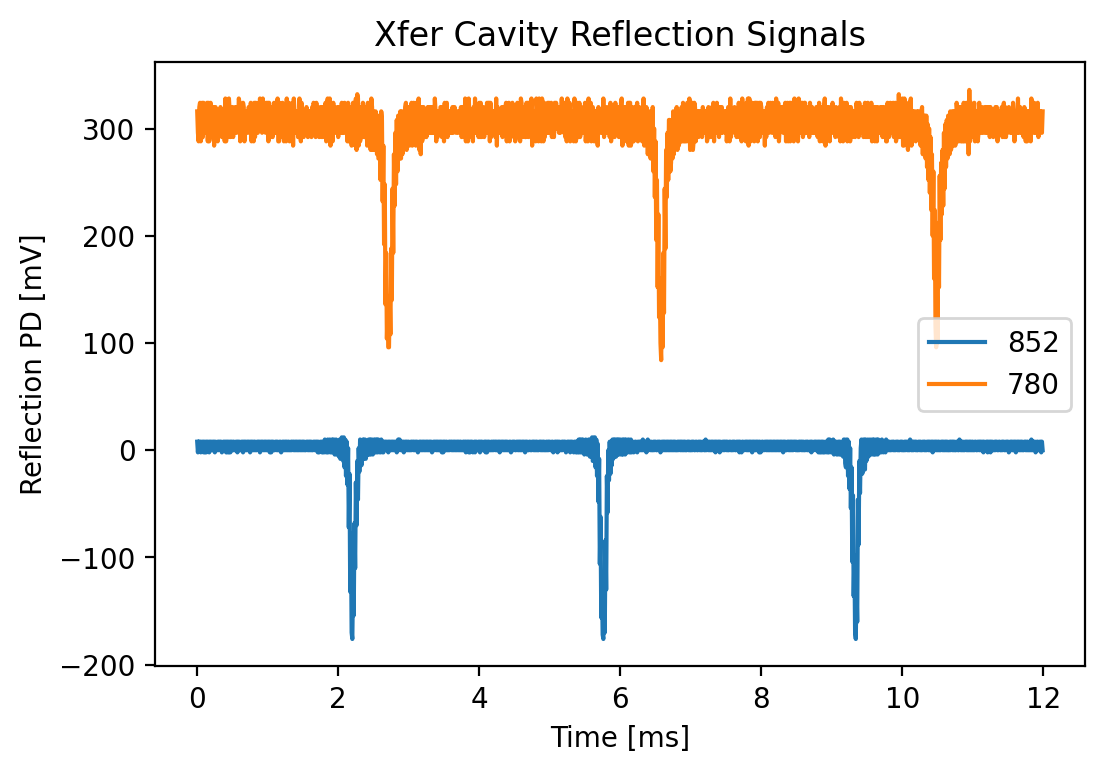

In [11]:
fig,ax = plt.subplots(dpi=200)
tpts = arange(0,len(data[0][1])*t_incr,t_incr)*1e3

ax.plot(tpts,data[0][1]*1e3,label='852')
# ax.plot(tpts,data[0][2]*1e3,label='ramp')
ax.plot(tpts,data[0][3]*1e3,label='780')

ax.set_ylabel('Reflection PD [mV]')
ax.set_title('Xfer Cavity Reflection Signals')

# ax1.plot(tpts,data[0][0],label='Ramp, locked')
# ax1.plot(tpts,data[1][0],label='Ramp, unlocked')
ax.set_xlabel('Time [ms]')
# ax1.set_ylabel("Ramp \n(to Piezo Driver) [V]")

ax.legend(loc='right')
fname = 'xfer_cav_reflections_20210802.png'
plt.savefig(fname,bbox_inches='tight')
print(f"wrote file to {fname}")
plt.show()